## 激活函数

### sigmoid函数

$$ h(x) = \frac{1}{1+e^{-x}}  $$

### 阶跃函数的实现

In [1]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

In [7]:
y = y.astype(np.int_)
y

array([0, 1, 1])

### 阶跃函数的图形

(-0.1, 1.1)

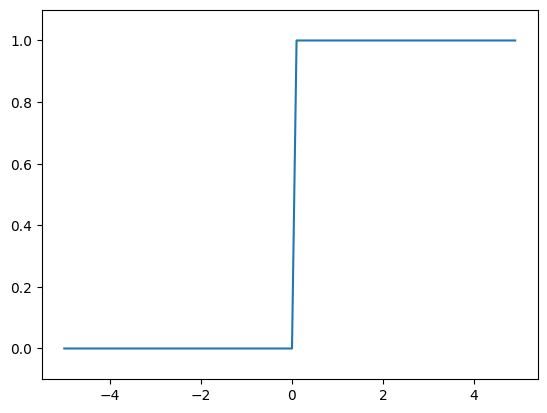

In [9]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int_)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围 plt.show()

### sigmoid 函数的实现

In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [14]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### sigmoid 函数的图形

(-0.1, 1.1)

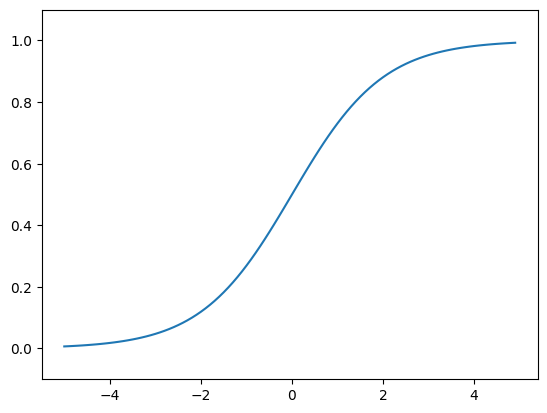

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围 plt.show()

神经网络的激活函数必须使用**非线性函数**。换句话说，激活函数不能使 用线性函数。为什么不能使用线性函数呢?因为使用线性函数的话，加深神经网络的层数就没有意义了。

线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无 隐藏层的神经网络”。

### ReLU 函数

$$ 
h(x) =
\begin{cases}
x, & \text{$(x > 0)$} \\
0, & \text{$(x \le 0)$}
\end{cases}

$$

In [17]:
def relu(x):
  return np.maximum(0, x)

### ReLU 函数的图形

(-1.0, 6.0)

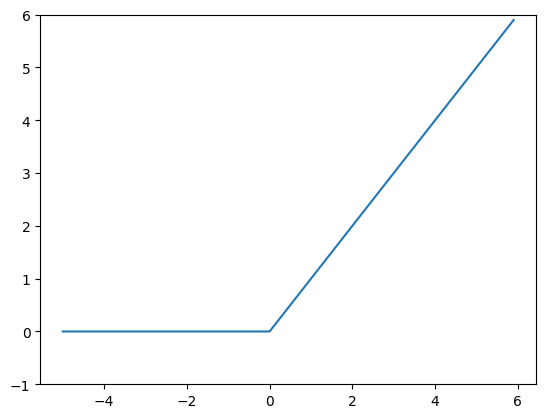

In [25]:
x = np.arange(-5.0, 6, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 6) # 指定y轴的范围 plt.show()

## 多维数组的运算

### 多维数组

In [26]:
import numpy as np

A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [27]:
np.ndim(A)

1

In [28]:
A.shape

(4,)

In [29]:
A.shape[0]

4

In [30]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [31]:
np.ndim(B)

2

In [32]:
B.shape

(3, 2)

### 矩阵乘法

$$ \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix} = \begin{pmatrix} 19 & 22 \\ 43 & 50 \end{pmatrix}  $$

In [34]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [35]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

使用numpy实现下面的神经网络

![](./images/nn-matrix-dot.png)

In [36]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
np.dot(X, W)

array([ 5, 11, 17])


![](./images/3layernn.png)

$$ A^{(1)} = XW^{(1)} + B^{(1)}$$ 

In [37]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

![](./images/3layerhnn.png)

继续添加激活函数

In [38]:
Z1 = sigmoid(A1)

In [39]:
print(A1)

[0.3 0.7 1.1]


In [40]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


继续第2层计算

In [42]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

输出层

In [43]:
def identity_function(x): 
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

[0.31682708 0.69627909]


代码小结

In [44]:
def init_network(): 
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 输出层的设计

一般而言，回归问题用恒等函数，分类问题用 `softmax` 函数。

`softmax` 函数。

$$ y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} $$

In [45]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

在进行指数运算的时候，可能会出现溢出的问题。

![](./images/softmax.png)

上面的公式说明，在进行 `softmax` 的指数函数的运算时，加上(或者减去) 某个常数并不会改变运算的结果。

为了防止溢出，一般会减去输入信号中的最大值

In [46]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [47]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])